In [82]:
import math
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle as rectangle
from matplotlib.patches import Ellipse as ellipse
from matplotlib.patches import Polygon as polygon
#%matplotlib tk
angle=10
class Linear_Transform():
    def __init__(self,vect,matrix):
        self.fig,self.ax=plt.subplots(nrows=1,ncols=1,figsize=(10,10))
        self.ox=0
        self.oy=0
        self.gx=6
        self.gy=6
        self.box=None
        self.Xaxis=None
        self.Yaxis=None
        self.Xs=[]
        self.Ys=[]
        self.matrix=matrix
        self.vect=vect
        self._Box()
        self._Axis()
        self._Grid()
        self.Transform_All()
        self.Draw()
    def Draw_Grid_Projection(self):
        ix=np.array([1,0],dtype=np.float64)
        iy=np.array([0,1],dtype=np.float64)
        nix=self.mul_pts(ix)
        niy=self.mul_pts(iy)
        tvx=self.tvect[1][0]
        tvy=self.tvect[1][1]
        self.Draw_Projection(nix[0],nix[1])
        self.Draw_Projection(niy[0],niy[1])
        self.Draw_Projection(tvx,tvy)
        self.ax.plot([nix[0]],[nix[1]],'go')
        self.ax.plot([niy[0]],[niy[1]],'go')
        self.ax.plot([tvx],[tvy],'go')
        return 0
    def Draw_Projection(self,vx,vy):
        ang=np.tan(self.vect[1][1]/self.vect[1][0])
        ax1_x=vx#*np.cos(ang)
        ax1_y=0#*np.sin(ang)
        ax2_x=0#*np.cos(ang)
        ax2_y=vy#*np.sin(ang)
        self.ax.plot([vx,ax1_x],[vy,ax1_y],'g--')
        self.ax.plot([vx,ax2_x],[vy,ax2_y],'g--')
        return [ax1_x,ax1_y],[ax2_x,ax2_y]
    def Draw(self):
        poly_pts=np.array([[0.5,0.5],[0.8,1.5],[1.3,1.7],[1.3,0.7],[0.5,0.5]])
        tpoly_pts=np.matmul(self.matrix,poly_pts.T).T
        marker='b'
        self.ax.plot(self.vect[:,0],self.vect[:,1],marker,linewidth=5)
        self.ax.plot(self.box[:,0],self.box[:,1],marker)
        self.ax.plot(self.Xaxis[:,0],self.Xaxis[:,1],marker+'--')
        self.ax.plot(self.Yaxis[:,0],self.Yaxis[:,1],marker+'--')
        for xx,yy in zip(self.Xs,self.Ys):
            #print(xx)
            self.ax.plot(xx[:,0],xx[:,1],marker+'--')
            self.ax.plot(yy[:,0],yy[:,1],marker+'--')
            
        rect=polygon(poly_pts,closed=True,fill=False)
        #ell=ellipse((1,1),0.5,2,angle=0,fill=False)
        ptc_coll=PatchCollection([rect],facecolor=marker,alpha=0.5)
        self.ax.add_collection(ptc_coll)
        cnt=poly_pts.mean(axis=0)
        self.ax.text(cnt[0],cnt[1],'Area:'+str(1.0),fontsize=10)
        
        marker='c'
        self.ax.plot(self.tvect[:,0],self.tvect[:,1],marker,linewidth=5,alpha=0.6)
        self.ax.plot(self.tbox[:,0],self.tbox[:,1],marker)
        self.ax.plot(self.TXaxis[:,0],self.TXaxis[:,1],marker+'--')
        self.ax.plot(self.TYaxis[:,0],self.TYaxis[:,1],marker+'--')
        
        for txx,tyy in zip(self.txx,self.tyy):
            self.ax.plot(txx[:,0],txx[:,1],marker+'--')
            self.ax.plot(tyy[:,0],tyy[:,1],marker+'--')
        
        pt=np.matmul(self.matrix,[1,0])
        angle=np.rad2deg(np.arctan2(pt[1],pt[0]))
        pt1=np.matmul(self.matrix,[1,1])
        
        rect=polygon(tpoly_pts,closed=True,fill=False)
        #ell=ellipse(pt1,0.5,2,angle=angle,fill=False)
        ptc_coll=PatchCollection([rect],facecolor=marker,alpha=0.5)
        self.ax.add_collection(ptc_coll)
        cnt=tpoly_pts.mean(axis=0)
        self.ax.text(cnt[0],cnt[1],'Area:'+str(np.linalg.det(self.matrix).round(2)),fontsize=10)
        _text='Matrix:\n'+str(self.matrix.round(2))+'\nDeterminant: '+str(np.linalg.det(self.matrix))
        self.ax.text(4,0,_text,fontsize=12)
        self.Draw_Grid_Projection()
        plt.show()

    
    def _Box(self):
        cx=self.ox
        cy=self.oy
        dx=1
        dy=1
        pts=[[cx-dx,cy+dy],
        [cx+dx,cy+dy],
        [cx+dx,cy-dy],
        [cx-dx,cy-dy],
        [cx-dx,cy+dy]]
        self.box=np.array(pts,dtype=np.float64)
        return self.box
    def _Axis(self):
        cx=self.ox
        cy=self.oy
        gx=self.gx
        gy=self.gy
        ax1=[[cx-gx//2,cy],
        [cx+gx//2,cy]]
        ax2=[[cx,cy-gy//2],
        [cx,cy+gy//2]]
        self.Xaxis=np.array(ax1,dtype=np.float64)
        self.Yaxis=np.array(ax2,dtype=np.float64)
        return self.Xaxis,self.Yaxis
    def _Grid(self):
        _y=-self.gy//2
        _x=-self.gx//2
        gx=self.gx
        gy=self.gy
        for i in range(self.gx+1):
            ax1=[[self.ox-gx//2,_y],
                 [self.ox+gx//2,_y]]
            self.Xs.append(ax1)
            _y+=1
        for i in range(self.gy+1): 
            ax2=[[_x,self.oy-gy//2],
                 [_x,self.oy+gy//2]]
            self.Ys.append(ax2)
            _x+=1
        self.Xs=np.array(self.Xs,dtype=np.float64)
        self.Ys=np.array(self.Ys,dtype=np.float64)
    def _mul_pts(self,source):
        points=source.copy()
        for i in range(len(points)):
            points[i]=points[i].dot(self.matrix)
        return points.copy()
    def mul_pts(self,source):
        points=source.copy()
        
        #points[i]=points[i].dot(self.matrix)
        points=np.matmul(self.matrix,points.T)
        points=points.T
        return points.copy()
    def Transform_All(self):
            self.tvect=self.mul_pts(self.vect)
            self.tbox=self.mul_pts(self.box)
            self.TXaxis=self.mul_pts(self.Xaxis)
            self.TYaxis=self.mul_pts(self.Yaxis)
            self.txx= []
            self.tyy= []
            for _xx,_yy in zip(self.Xs,self.Ys):
                self.txx.append(self.mul_pts(_xx))
                self.tyy.append(self.mul_pts(_yy))
            

            return 0

In [83]:
poly_pts=np.array([[0.5,0.5],[0.8,1.5],[1.3,1.7],[1.3,0.7],[0.5,0.5]])
poly_pts.mean(axis=0)

array([0.88, 0.98])

### Basis vecotrs
    
$\begin{equation*}
 i=
\begin{bmatrix}
i_{x}  \\
i_{y}  \\
\end{bmatrix}
j=
\begin{bmatrix}
j_{x} \\
j_{y} \\
\end{bmatrix}\\
\end{equation*}$

     1. Conventional basis vector :
$\begin{equation*}
 i=
\begin{bmatrix}
1  \\
0  \\
\end{bmatrix}
j=
\begin{bmatrix}
0 \\
1  \\
\end{bmatrix}\\
\end{equation*}$

     2. Rotation basis vector :
$\begin{equation*}
[i']=
\begin{bmatrix}
cos(ang) \\
sin(ang) \\
\end{bmatrix}
[j']=
\begin{bmatrix}
-sin(ang)  \\
 cos(ang)  \\
\end{bmatrix}
\end{equation*}$

### Basis vector to x,y co-ordinate :
$\begin{equation*}
vect=a_{i}i+a_{y}j\\
x=a_{i}*i_{x}+a_{j}*j_{x}\\
y=a_{i}*i_{y}+a_{j}*j_{y}\\
\end{equation*}$
    1. Conventional vector to x,y co-ordinates conversion   :

$\begin{equation*}
vect=a_{i}i+a_{j}j\\
x=a_{i}*i_{x}+a_{j}*j_{y}=a_{i}*1+a_{j}*0=a_{i}\\
y=a_{i}*i_{y}+a_{j}*j_{y}=a_{i}*0+a_{j}*1=a_{j}\\
\end{equation*}$

     2. Roation basis vector to x,y co-ordinate conversion :
     
$\begin{equation*}
theta= 30^o \\
vect=a_{i}i'+a_{j}j'\\
x=a_{i}*i'_{x}+a_{j}*j'_{x}=a_{i}*cos(\theta)-a_{j}*sin(\theta)\\
y=a_{i}*i'_{y}+a_{j}*j'_{y}=a_{i}*sin(\theta)+a_{j}*cos(\theta)\\
\end{equation*}$

$\begin{equation*}
\begin{bmatrix}
ix && jx \\
iy && jy \\
\end{bmatrix}
\begin{bmatrix}
x \\
y \\
\end{bmatrix}=
\begin{bmatrix}
1 && 0  \\
0 && 1  \\
\end{bmatrix}
\begin{bmatrix}
x \\
y \\
\end{bmatrix}\\
\begin{bmatrix}
i'x && j'x \\
i'y && j'y \\
\end{bmatrix}
\begin{bmatrix}
x \\
y \\
\end{bmatrix}=
\begin{bmatrix}
cos(\theta) && -sin(\theta)  \\
sin(\theta) &&  cos(\theta)  \\
\end{bmatrix}
\begin{bmatrix}
x \\
y \\
\end{bmatrix}
\end{equation*}$

$\begin{equation*}
\theta=f(x,y)=x^2+y^2\\
vect=a_{i}i'+a_{j}j'\\
x=a_{i}*i'_{x}+a_{j}*j'_{x}=a_{i}*cos(\theta)-a_{j}*sin(\theta)\\
y=a_{i}*i'_{y}+a_{j}*j'_{y}=a_{i}*sin(\theta)+a_{j}*cos(\theta)\\
.\\
.\\
vect=a_{i}i+a_{y}j\\
x=f_{x}(x,y)=a_{i}*i_{x}+a_{j}*j_{x}\\
y=f_{y}(x,y)=a_{i}*i_{y}+a_{j}*j_{y}\\
.\\
.\\
\begin{bmatrix}
\frac{\partial }{\partial x}f_{x}(x,y) &&  \frac{\partial }{\partial y}f_{x}(x,y) \\
\frac{\partial }{\partial x}f_{y}(x,y) &&  \frac{\partial }{\partial y}f_{y}(x,y) \\
\end{bmatrix}
\end{equation*}$

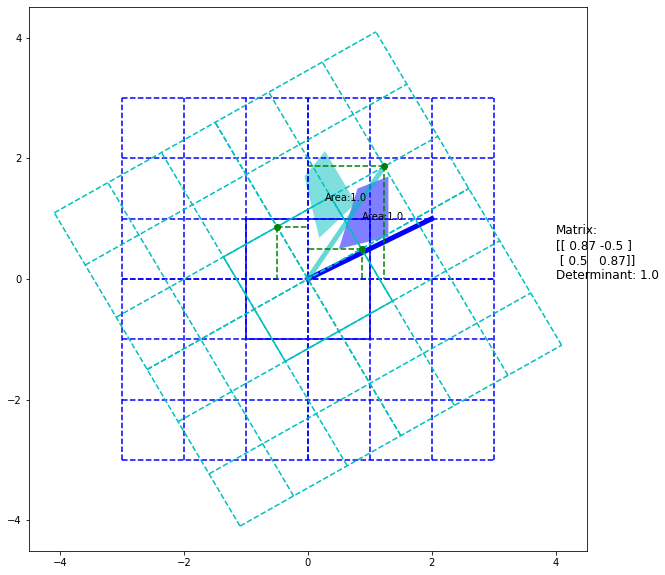

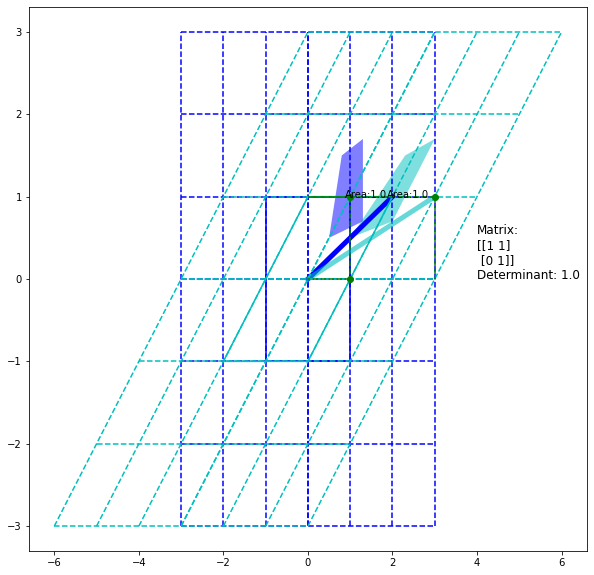

In [84]:
phi=np.deg2rad(30)
matrix1=np.array([[math.cos(phi),-math.sin(phi)],
                [math.sin(phi),math.cos(phi)]])
matrix2=np.array([[1 , 1],
                  [0 , 1]])
matrix3=np.array([[1 , 1],
                  [1 , 1]])
matrix4=np.array([[1 , 1],
                  [1 , 2]])
vect=[[0,0],
      [2,1]]
#vect=[[1,1]]
vect=np.array(vect,dtype=np.float64)
mats = [matrix1,matrix2]#,matrix2,matrix3,matrix4]
for mat in mats:
    lt=Linear_Transform(vect,mat)

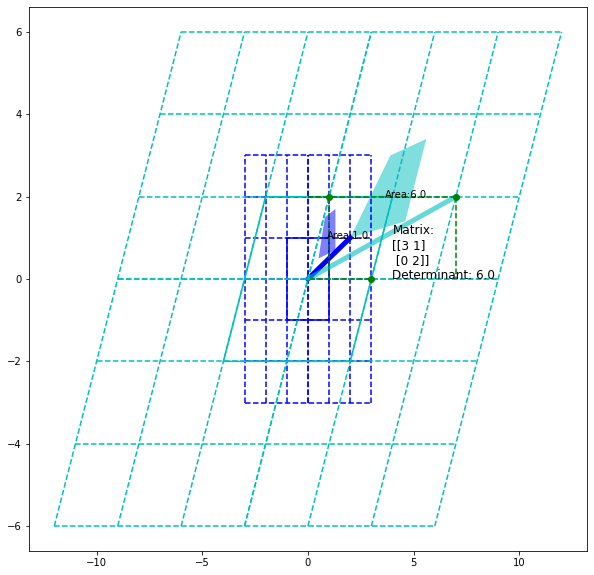

In [90]:
matrix=np.array([[3 , 1],
                  [0 , 2]])
lt=Linear_Transform(vect,matrix)